## Example 01 - Defining a basic graph

### Imports
Import the required libraries

In [1]:
import opentnsim
print('This notebook has been tested with OpenTNSim version {}'.format(opentnsim.__version__))

This notebook has been tested with OpenTNSim version 1.0.0


In [2]:
# spatial libraries 
import pyproj
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import matplotlib.pyplot as plt

# OpenTNSIM
import opentnsim.core as core

# Used for making the graph to visualize our problem
import networkx as nx  

### Create graph
The transport_network_analysis package works with mix-in classes to allow for flexibility in defining nodes. 

A graph contains *edges* (red dots in plot below) and *vertices* (black lines in plot below).

In [3]:
Node = type('Site', (core.Identifiable, core.Log, core.Locatable, core.HasResource), {})

data_node_1 = {"env": [],
               "name": "Node 1",
               "geometry": shapely.geometry.Point(0, 0)}
data_node_2 = {"env": [],
               "name": "Node 2",
               "geometry": shapely.geometry.Point(0, 10)}
data_node_3 = {"env": [],
               "name": "Node 3",
               "geometry": shapely.geometry.Point(10, 10)}
data_node_4 = {"env": [],
               "name": "Node 4",
               "geometry": shapely.geometry.Point(10, 0)}

node_1 = Node(**data_node_1)
node_2 = Node(**data_node_2)
node_3 = Node(**data_node_3)
node_4 = Node(**data_node_4)

nodes = [node_1, node_2, node_3, node_4]

For this example we make a directed graph, which means that some edges might accomodate two-way traffic while others may be strictly for one-way traffic. 

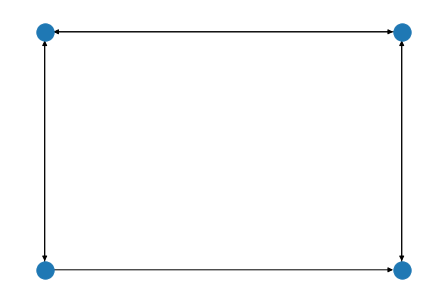

In [4]:
FG = nx.DiGraph()

positions = {}
for node in nodes:
    positions[node.name] = (node.geometry.x, node.geometry.y)
    FG.add_node(node.name, geometry = node.geometry)

path = [[node_1, node_2], # From node 1 to node 2
        [node_1, node_4], # From node 1 to node 4
        [node_2, node_1], # From node 2 to node 1
        [node_2, node_3], # From node 2 to node 3
        [node_3, node_2], # From node 3 to node 2
        [node_3, node_4], # From node 3 to node 4
        [node_4, node_3]] # From node 4 to node 3 - So one-way traffic is from node 1 to node 4

for edge in path:
    FG.add_edge(edge[0].name, edge[1].name, weight = 1)

# env.FG = FG
nx.draw(FG, positions)
plt.show()

### Define paths

In [5]:
# First simulation is from Node 1 to Node 4
path_1 = nx.dijkstra_path(FG, node_1.name, node_4.name)

# Second simulation is from Node 4 to Node 1
path_2 = nx.dijkstra_path(FG, node_4.name, node_1.name)

paths = [path_1, path_2]

In [6]:
print(paths)

[['Node 1', 'Node 4'], ['Node 4', 'Node 3', 'Node 2', 'Node 1']]
